In [380]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd 
import yfinance as yf
import numpy as np
import datetime as dt
from pandas_profiling import ProfileReport
import seaborn as sns


In [381]:
# params
dtfrom = "2016-1-1" #dt.date(2014,1,1)
dtto = "2017-1-1" #dt.date(2017,1,1)

polluant='pm25'


In [382]:
#data = pd.read_csv("..\data\coloane,-macau-air-quality.csv",)
data = pd.read_csv("..\data\parque-central da taipa, macau-air-quality.csv",)
data.date=pd.to_datetime(data.date)
data=data.sort_values('date',ascending=False)
data.index=data.date
data.pop('date')

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
"""
mapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))
data.rename(columns=mapper)
"""
for c in data.columns:
    data[c]= pd.to_numeric(data[c], errors='coerce')
    

date
2021-03-01   2021-03-01
2021-02-28   2021-02-28
2021-02-27   2021-02-27
2021-02-26   2021-02-26
2021-02-25   2021-02-25
                ...    
2014-06-29   2014-06-29
2014-06-28   2014-06-28
2014-06-27   2014-06-27
2014-06-26   2014-06-26
2014-06-25   2014-06-25
Name: date, Length: 2027, dtype: datetime64[ns]

'\nmapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))\ndata.rename(columns=mapper)\n'

In [383]:
if False:
    ProfileReport(data)

<AxesSubplot:xlabel='date'>

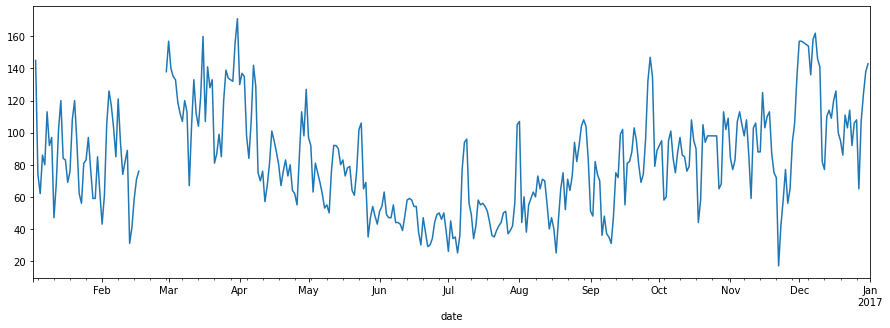

In [384]:

pastpolluant='past'+polluant
df= data[(data.index > dtfrom) & (data.index <= dtto)].copy()

fig,axs=plt.subplots(figsize=(15,5))
df[polluant].plot(ax=axs)
pastpolluants=[]
for pol in data.columns:
    pastpolluants.append( 'past'+pol)
    df[pastpolluants[-1]]=data[pol].shift(1)

<AxesSubplot:xlabel='pastpm25', ylabel='pm25'>

<AxesSubplot:xlabel='pastpm25', ylabel='pm25'>

0.6450978204017301

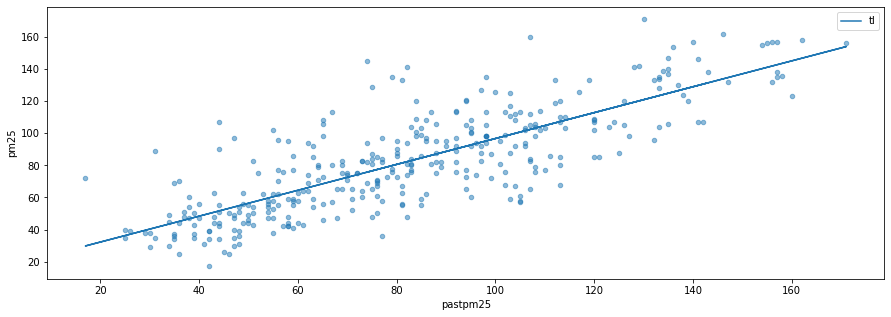

In [385]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#regression on polluant self past value

fig,axs= plt.subplots(figsize=(20,10))
regr = linear_model.LinearRegression()
X= df[[pastpolluant,polluant]].dropna(how='any')
X.plot(kind='scatter',ax=axs, x = pastpolluant, y = polluant, figsize=(15,5), alpha =0.5)
y = X.pop(polluant)
regression = regr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))
trendln = pd.DataFrame({'tl':regression.predict(X.values.reshape(-1,1)).reshape(1,-1)[0]},index=X.values.reshape(1,-1)[0])
trendln.plot(ax=axs)

regression.score(X, y)


In [386]:
# regression on all past polluants 
regr = linear_model.LinearRegression()

#df[pastpolluants+[polluant]].head()
X= df[pastpolluants+[polluant]].dropna(how='any')
y= pd.DataFrame(X.pop(polluant))
#sns.pairplot(X[pastpolluants+[polluant]])

array([[ 0.81602006, -0.12249953, -0.1152434 ,  0.3432513 , -0.18190334,
        -0.11425067]])

0.6399605624055942

<AxesSubplot:xlabel='date'>

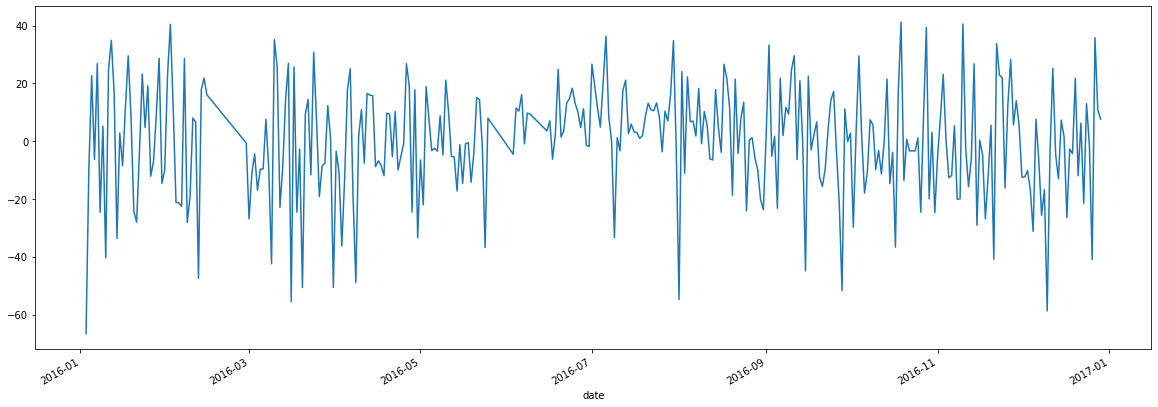

In [387]:
#X.plot(kind='scatter',ax=axs, x = pastpolluants, y =polluant, figsize=(15,5), alpha =0.5)
#y = X.pop(polluant)
regression = regr.fit(X.values,y.values.reshape(-1,1))
y['predicted'] = regression.predict(X.values).reshape(1,-1)[0]
#trendln.plot(ax=axs)
regression.coef_
regression.score(X, y[polluant])
(y['predicted']-y[polluant]).plot(figsize=(20,7))

# add weather features

In [388]:
smgdata = pd.read_csv("..\data\smg-weather-jan2010-feb2021.csv",)
smgdata=smgdata[smgdata.columns[:-3]]
smgdata.date=pd.to_datetime(smgdata.date)
smgdata=smgdata.sort_values('date',ascending=False)
smgdata.index=smgdata.date
smgdata.pop('date')

smgdata.columns = smgdata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

"""
mapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))
data.rename(columns=mapper)
"""
for c in smgdata.columns:
    smgdata[c]= pd.to_numeric(smgdata[c], errors='coerce')

date
2021-02-23   2021-02-23
2021-02-22   2021-02-22
2021-02-21   2021-02-21
2021-02-20   2021-02-20
2021-02-19   2021-02-19
                ...    
2010-01-05   2010-01-05
2010-01-04   2010-01-04
2010-01-03   2010-01-03
2010-01-02   2010-01-02
2010-01-01   2010-01-01
Name: date, Length: 4072, dtype: datetime64[ns]

'\nmapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))\ndata.rename(columns=mapper)\n'

In [389]:
smgdata.info()
smgdata.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4072 entries, 2021-02-23 to 2010-01-01
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pressure    4072 non-null   float64
 1   temp_max    4072 non-null   float64
 2   temp_mean   4072 non-null   float64
 3   temp_min    4072 non-null   float64
 4   dew_mean    4072 non-null   float64
 5   humidity    4072 non-null   int64  
 6   insolation  4066 non-null   float64
 7   wind_dir    0 non-null      float64
 8   wind_speed  4072 non-null   int64  
 9   rain        3499 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 349.9 KB


Index(['pressure', 'temp_max', 'temp_mean', 'temp_min', 'dew_mean', 'humidity',
       'insolation', 'wind_dir', 'wind_speed', 'rain'],
      dtype='object')

In [390]:
smgdata.pop('wind_dir')
sum(smgdata.isnull().any(axis=1))  # missing data ?
smgdata.isnull()[smgdata.columns].sum()

date
2021-02-23   NaN
2021-02-22   NaN
2021-02-21   NaN
2021-02-20   NaN
2021-02-19   NaN
              ..
2010-01-05   NaN
2010-01-04   NaN
2010-01-03   NaN
2010-01-02   NaN
2010-01-01   NaN
Name: wind_dir, Length: 4072, dtype: float64

579

pressure        0
temp_max        0
temp_mean       0
temp_min        0
dew_mean        0
humidity        0
insolation      6
wind_speed      0
rain          573
dtype: int64

In [391]:
df = pd.merge(data,smgdata,on='date').copy()
df= df[(df.index > dtfrom) & (df.index <= dtto)]
df

,pm25,pm10,o3,no2,so2,co,pressure,temp_max,temp_mean,temp_min,dew_mean,humidity,insolation,wind_speed,rain
date,,,,,,,,,,,,,,,
2017-01-01,NaN,53.0,28.0,36.0,4.0,6.0,1021.8,22.4,18.7,16.2,15.5,82,4.7,7,0.0
2016-12-31,143.0,NaN,NaN,NaN,NaN,NaN,1022.9,21.8,17.3,13.8,11.3,69,7.6,10,0.0
2016-12-30,138.0,73.0,39.0,45.0,6.0,6.0,1024.4,19.7,15.4,12.6,7.0,58,3.0,14,0.0
2016-12-29,124.0,65.0,32.0,33.0,7.0,5.0,1024.4,17.7,14.4,12.2,5.3,55,2.1,18,0.0
2016-12-28,107.0,57.0,32.0,20.0,5.0,5.0,1023.2,15.5,12.8,9.4,5.2,60,0.7,22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-06,86.0,41.0,40.0,20.0,4.0,7.0,1019.0,24.3,20.0,16.9,17.5,86,6.5,12,NaN
2016-01-05,62.0,42.0,55.0,23.0,4.0,6.0,1015.8,22.8,19.8,18.5,19.2,96,0.1,8,1.4
2016-01-04,74.0,29.0,23.0,20.0,4.0,6.0,1018.8,22.4,19.6,18.4,18.5,94,0.0,6,0.4


In [392]:
X=df[[c for c in df.columns if not c in ('wind_dir','rain')]].copy()
#for c in X.columns[:6]:
#    X[c]=X[c].apply(np.log1p)
X['target']=X[polluant].shift(-1)
X=X.dropna(how='any')

In [393]:
X.describe()
X.info()

,pm25,pm10,o3,no2,so2,co,pressure,temp_max,temp_mean,temp_min,dew_mean,humidity,insolation,wind_speed,target
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,83.471471,36.603604,33.732733,18.732733,3.621622,5.447447,1012.518318,25.991291,22.829730,20.584084,19.784985,83.873874,4.202102,10.576577,83.663664
std,31.714985,15.720035,19.179967,7.739979,2.426215,1.517300,6.784163,5.943287,5.678997,5.687787,6.318972,10.570575,4.069845,4.998583,31.902163
min,17.000000,7.000000,3.000000,5.000000,1.000000,1.000000,993.300000,6.400000,3.600000,1.600000,-3.800000,38.000000,0.000000,4.000000,17.000000
25%,58.000000,24.000000,20.000000,13.000000,2.000000,4.000000,1008.100000,21.800000,18.700000,16.500000,15.400000,78.000000,0.100000,7.000000,58.000000
50%,82.000000,36.000000,29.000000,18.000000,3.000000,5.000000,1011.900000,27.200000,24.500000,22.200000,22.000000,85.000000,2.800000,10.000000,82.000000
75%,104.000000,47.000000,43.000000,23.000000,4.000000,6.000000,1017.300000,31.100000,27.400000,25.200000,25.100000,92.000000,8.100000,13.000000,105.000000
max,171.000000,81.000000,134.000000,48.000000,24.000000,10.000000,1035.000000,36.000000,31.800000,29.800000,26.900000,99.000000,12.700000,34.000000,171.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333 entries, 2016-12-30 to 2016-01-04
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pm25        333 non-null    float64
 1   pm10        333 non-null    float64
 2   o3          333 non-null    float64
 3   no2         333 non-null    float64
 4   so2         333 non-null    float64
 5   co          333 non-null    float64
 6   pressure    333 non-null    float64
 7   temp_max    333 non-null    float64
 8   temp_mean   333 non-null    float64
 9   temp_min    333 non-null    float64
 10  dew_mean    333 non-null    float64
 11  humidity    333 non-null    int64  
 12  insolation  333 non-null    float64
 13  wind_speed  333 non-null    int64  
 14  target      333 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 41.6 KB


In [394]:
if False:
    ProfileReport(X)

array([[  0.81069308,  -0.1491286 ,  -0.05124564,   0.47748935,
         -0.5017992 ,  -0.8906183 ,   0.54785843,  -1.42856004,
         17.03484266,  -0.66516102, -14.60365252,   3.10946233,
         -0.54249964,   0.3667058 ]])

0.6597463467760408

<AxesSubplot:title={'center':'residuals'}, xlabel='date'>

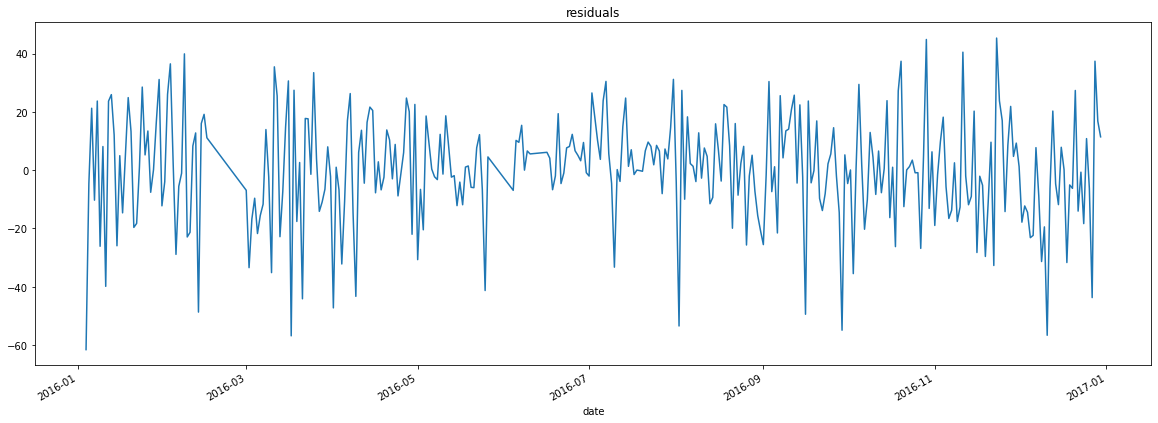

In [395]:
y=pd.DataFrame(X.pop('target'))
regression = regr.fit(X.values,y.values.reshape(-1,1))
y['predicted'] = regression.predict(X.values).reshape(1,-1)[0]
#trendln.plot(ax=axs)
regression.coef_
regression.score(X, y['target'])
(y['predicted']-y['target']).plot(title="residuals", figsize=(20,7))

'"\nX2[\'dow\']=X2.index.map(lambda x: dt.datetime.strftime(x,"%a"))\nX2= pd.merge(X2,pd.get_dummies(X2[\'dow\']),on=\'date\')\ndel X2[\'dow\']\n'

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     64.99
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           3.43e-67
Time:                        21:06:50   Log-Likelihood:                -1453.0
No. Observations:                 333   AIC:                             2926.
Df Residuals:                     323   BIC:                             2964.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co            -0.5791      0.883     -0.656      0.5

<AxesSubplot:title={'center':'residuals'}, xlabel='date'>

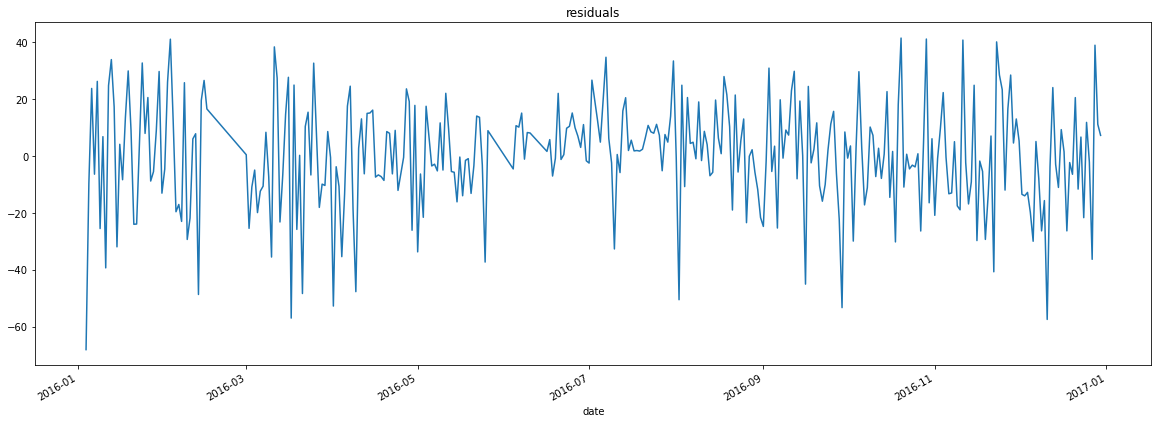

In [396]:
import statsmodels.api as sm
#[['pm25','pm10','o3']]
#[['pm25','pm10','o3','no2','so2','co',]]
X2 = sm.add_constant(X[X.columns.difference(['temp_max','temp_mean','temp_max','humidity','insolation','pressure'])], prepend=False)
""""
X2['dow']=X2.index.map(lambda x: dt.datetime.strftime(x,"%a"))
X2= pd.merge(X2,pd.get_dummies(X2['dow']),on='date')
del X2['dow']
"""

mod = sm.OLS(y['target'], X2)
res = mod.fit()
print(res.summary())

y['predicted']=res.predict(X2)
(y['predicted']-y['target']).plot(title="residuals",figsize=(20,7))

<AxesSubplot:title={'center':'ACF'}>

<AxesSubplot:title={'center':'PACF'}>

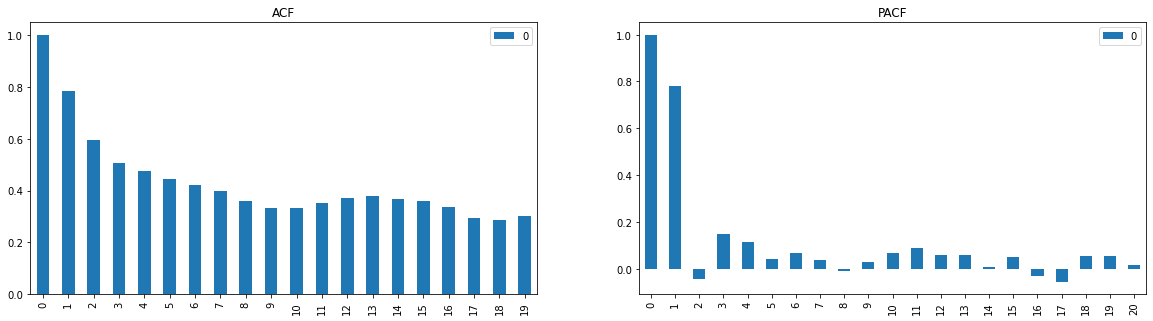

In [397]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

pd.DataFrame([y['target'].autocorr(i) for i in range(20)]).plot(kind='bar', title='ACF',ax=axs[0])
pd.DataFrame(sm.tsa.stattools.pacf(y.target.values,nlags=20)).plot(kind='bar', title='PACF',ax=axs[1])

In [398]:
y.target.head()

date
2016-12-30    124.0
2016-12-29    107.0
2016-12-28     65.0
2016-12-27    108.0
2016-12-26    106.0
Name: target, dtype: float64

period minimizing RMSE: 10


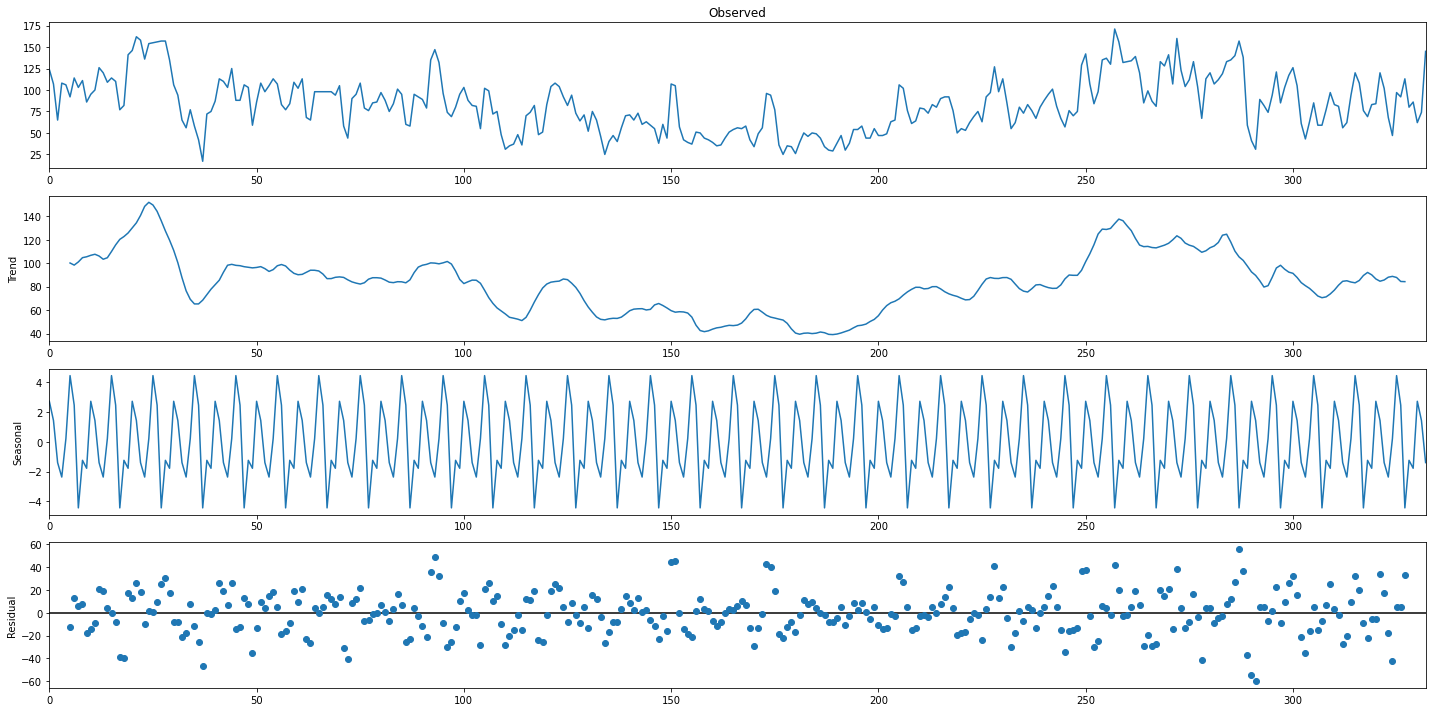

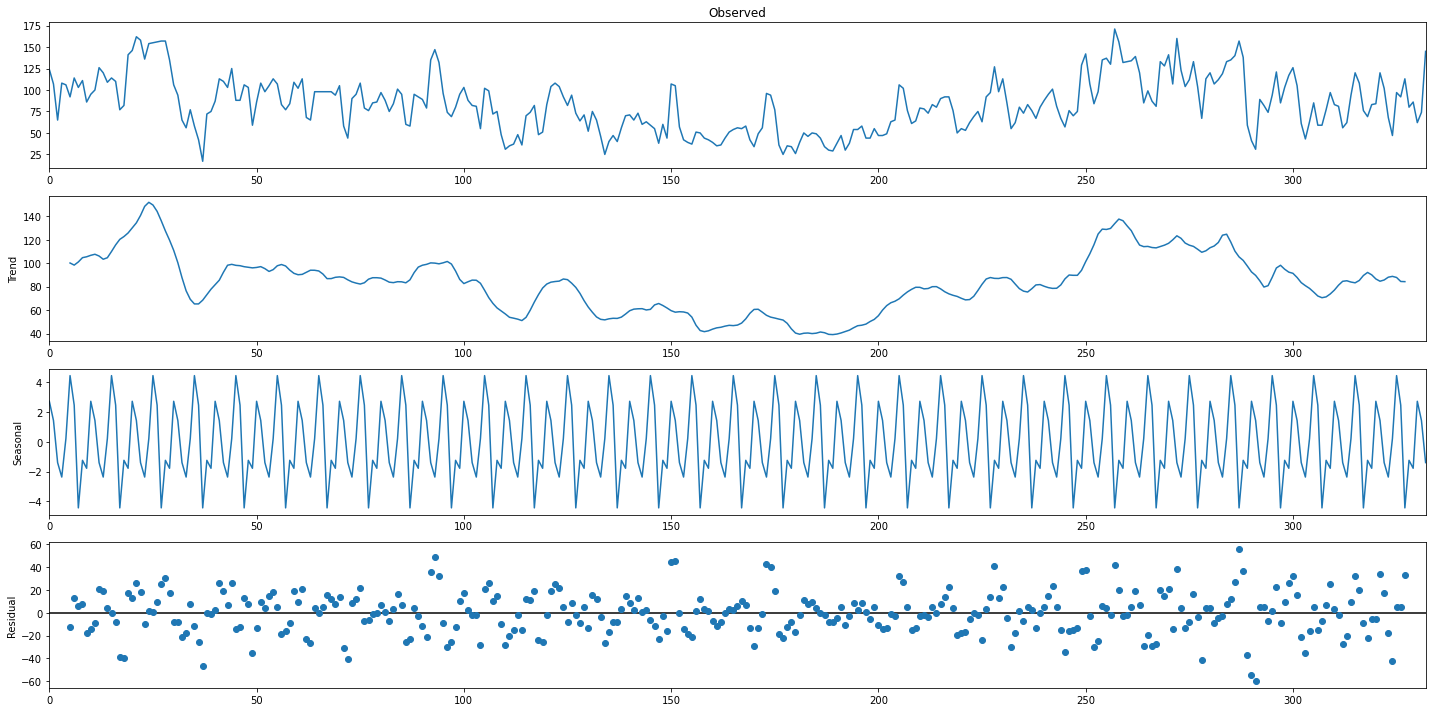

In [399]:
# ARIMA fitting  
import pylab
from statsmodels.tsa.seasonal import seasonal_decompose

pylab.rcParams['figure.figsize'] = (20, 10)
minper,bestper=0,1
for per in range(10,60):
    res= seasonal_decompose(y.target.values,model ='additive', period=per)
    minper, bestper = (np.nansum(res.resid**2),per) if per==10 else (minper, bestper)
    if np.nansum(res.resid**2) < minper:
        minper= np.nansum(res.resid**2)
        bestper=per
        
print("period minimizing RMSE: " + str(bestper))
seasonal_decompose(y.target.values,model ='additive', period=bestper).plot()

In [400]:
!conda install -c conda-forge pmdarima
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(airline['# Passengers'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
PCA
ACF PACF ?
VAR ? 

R2 w.r.t calibration 
predictive power ?
over further time scales ?
